### 실습
- selenium 라이브러리를 통해 한솥도시락 메뉴데이터 수집
- 수집한 데이터를 csv 파일로 추출

In [1]:
# 필요한 라이브러리 설치
# !pip install selenium
# !pip install webdriver
# !pip install pandas

In [2]:
# 필요한 라이브러리 import

from selenium import webdriver as wb # 컴퓨터용 부라우저 
from selenium.webdriver.common.keys import Keys # 컴퓨터용 키보드 
from selenium.webdriver.common.by import By # 선택자 지정 방식
import pandas as pd
import time

In [3]:
# 타겟 정보

url = 'https://www.hsd.co.kr/menu/menu_list'

# 더보기 버튼의 class name
MORE_PAGE = 'c_05'

# 메뉴의 이름 class name : 
MENU_NAME = 'h.fz_03'

# 메뉴의 가격 class : 
MENU_PRICE = 'div.item-price > strong'


In [4]:
# 목표 사이트 접속
driver = wb.Chrome()

driver.get(url)
time.sleep(1)

In [5]:
def find_css_list_position(input) :
    result = driver.find_elements(By.CLASS_NAME, input) 
    return result 
     

In [6]:
while(True) : 
    try :
        moreButton = driver.find_element(By.CLASS_NAME, MORE_PAGE)  
        moreButton.click()
        time.sleep(1) 
    except :
        print(f'버튼을 더이상 찾을 수 없습니다.')
        break;

버튼을 더이상 찾을 수 없습니다.


In [7]:
get_menu_list = driver.find_elements(By.CLASS_NAME, MENU_NAME) 
get_menu_price = driver.find_elements(By.CSS_SELECTOR, MENU_PRICE)  

In [8]:
print(len(get_menu_list))
menu_list = [t.text for t in get_menu_list]

91


In [9]:
print(len(get_menu_price))
menu_price = [t.text for t in get_menu_price]

91


In [10]:
driver.close()

In [11]:
df = pd.DataFrame({'메뉴' : menu_list ,'가격': menu_price})
df = df.reset_index(drop=True)  # 인덱스를 0부터 다시 설정
df.index = df.index + 1  # 인덱스를 1부터 시작하도록 변경
df

,메뉴,가격
1,빅 제많덮(빅 제육 많이 덮밥),"6,900"
2,제많덮(제육 많이 덮밥),"5,900"
3,진달래,"8,000"
4,해바라기,"10,000"
5,매화,"10,500"
...,...,...
87,후라이드 순살(소)_케이준소스,"4,000"
88,후라이드 순살(중),"7,500"
89,"치킹 반반순살(양념, 후라이드)","16,900"
90,치킹 반반순살(후라이드),"16,900"


In [12]:
# csv 파일로 만들기

df.to_csv('hs_menu_name_and_price.csv', encoding = 'utf-8')

In [13]:
df['가격'] = df['가격'].str.replace(',', '', regex=True).astype('int')

In [14]:
priceMean = df['가격'].mean().astype('int')
priceMax = df['가격'].max()
priceMin = df['가격'].min()
print(f'한솥의 평균 가격 : {priceMean:,}원')
print(f'한솥의 최소 가격 : {priceMax:,}원')
print(f'한솥의 최대 가격 : {priceMin:,}원')

한솥의 평균 가격 : 5,116원
한솥의 최소 가격 : 16,900원
한솥의 최대 가격 : 500원


In [15]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='Malgun Gothic')

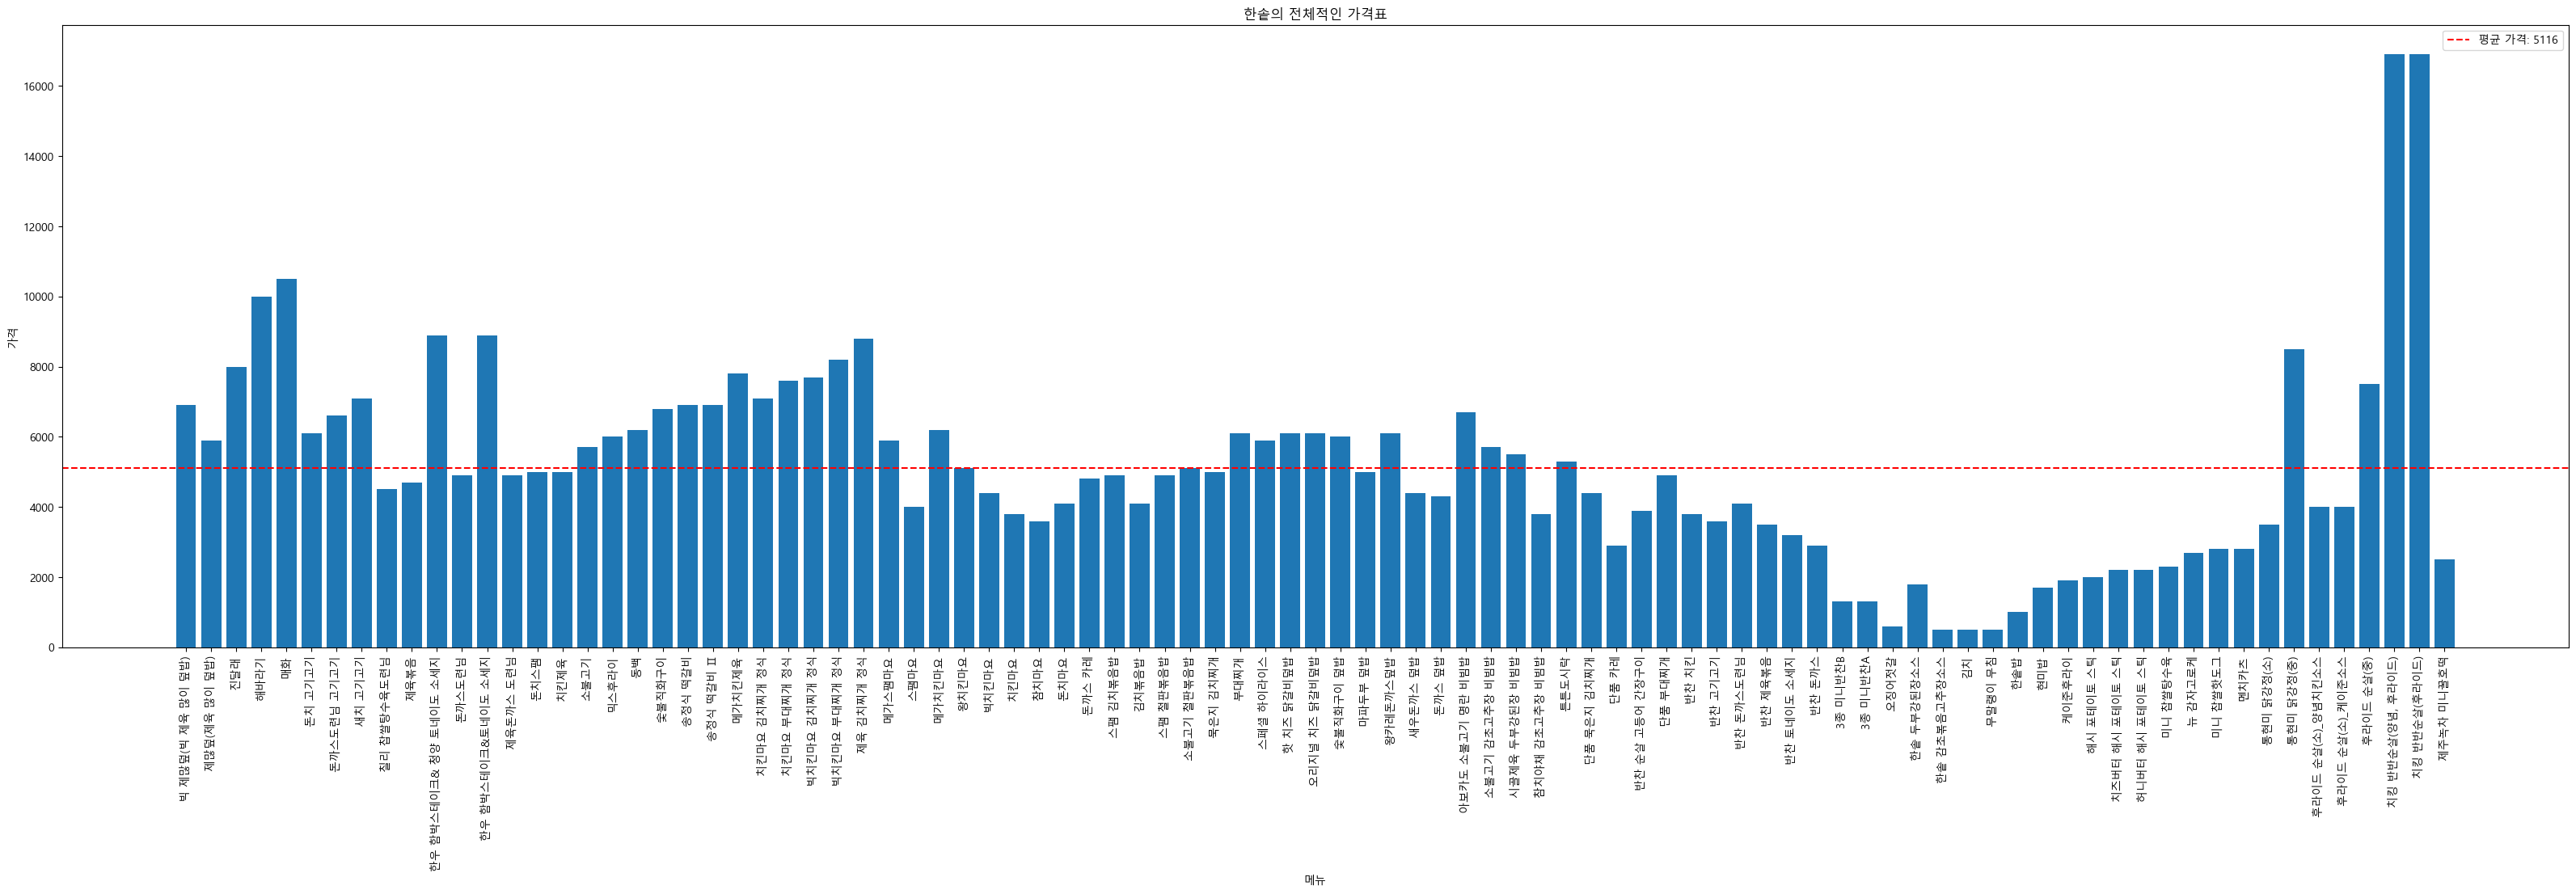

In [16]:
# 그래프 그리기
x = df['가격']
y = df['메뉴']


# 그래프 크기 조정
plt.figure(figsize=(40, 10))

# 평균값 계산
average_price = x.mean().astype('int')

# 평균값을 그래프에 표시
plt.axhline(average_price, color='red', linestyle='--', label=f'평균 가격: {average_price}')


plt.bar(y, x)
plt.title('한솥의 전체적인 가격표')

plt.ylabel('가격')
plt.xlabel('메뉴')


# x축 글자 90도 회전
plt.xticks(rotation=90)

plt.legend()

plt.show()